# Chirped Z-transform (CZT)

CZT allows, in a single step, to propagate to a near or far observation plane. IThe main advantage of CZT is that the region of interest and the sampling numbers can be arbitrarily chosen, endowing CZT with superior flexibility, and produces much faster results (acceleration > x100 with respect to RS algorithm) for focusing and far field diffraction patterns.

As the sampling area and pixels can be reduced to the desired observation area, the storage is also greatly reduced.

CZT algorithm allows to have a XY mask and compute in XY, Z, XZ, XYZ schemes, simply defining the output arrays.


In [13]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 250


## X Scheme

In [14]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z



In [15]:
size = 250*um
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
z = 2*mm


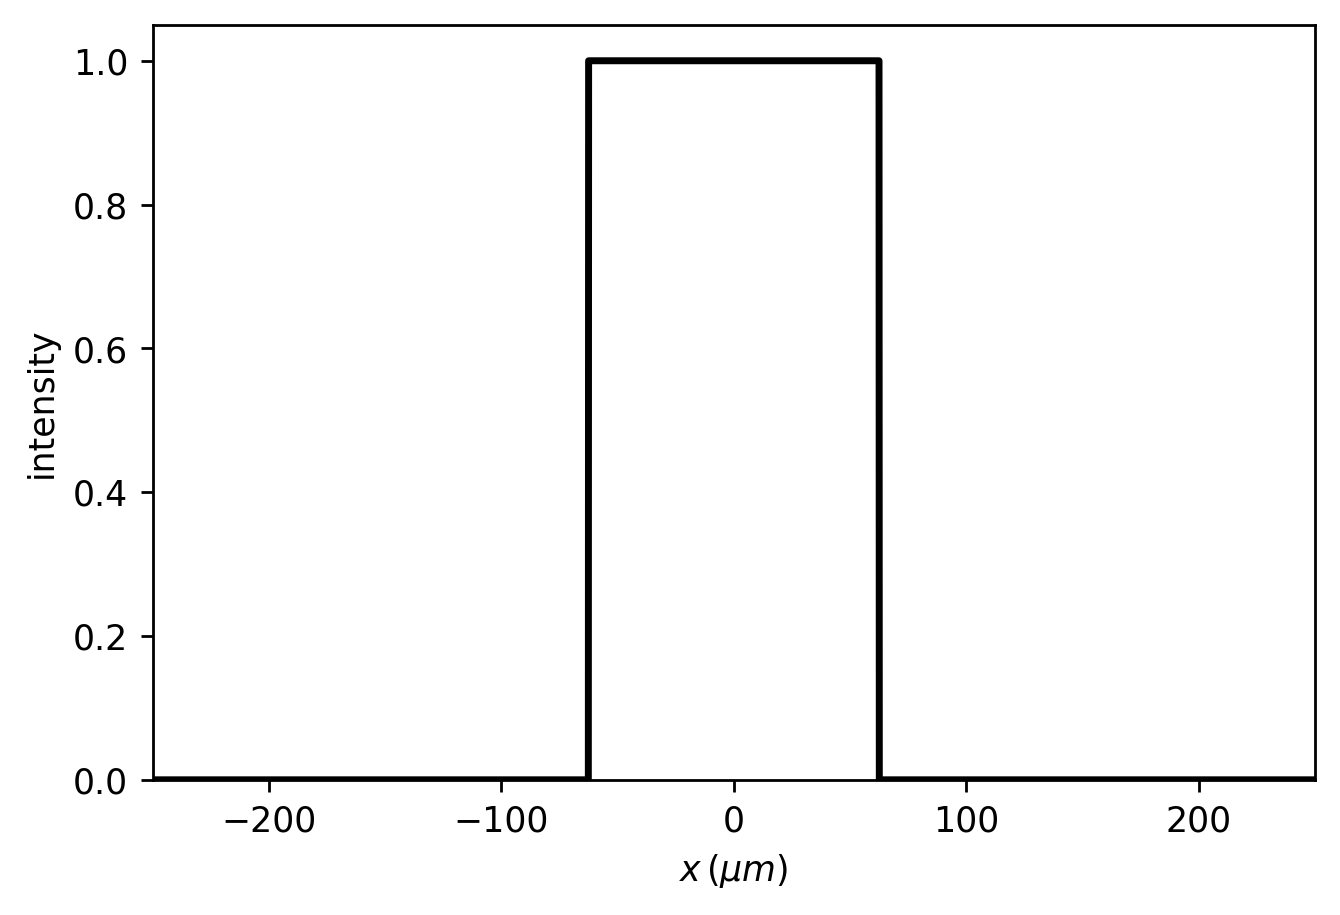

In [16]:
t0 = Scalar_mask_X(xin, wavelength)
t0.slit(x0=0, size=size/2)
u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0*u0
u1.draw()


### to just one data

In [17]:
xout = 0.
z = 2*mm


In [18]:
%%time
u2 = u1.CZT(z, xout)
print(u2)


[0.04131865-0.87270006j]
CPU times: user 5.66 ms, sys: 214 µs, total: 5.87 ms
Wall time: 4.53 ms


### to field_z

In [19]:
xout = 0
z = np.linspace(.5*mm, 10*mm, 1024)


In [20]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 2.09 s, sys: 10.9 ms, total: 2.1 s
Wall time: 2.09 s


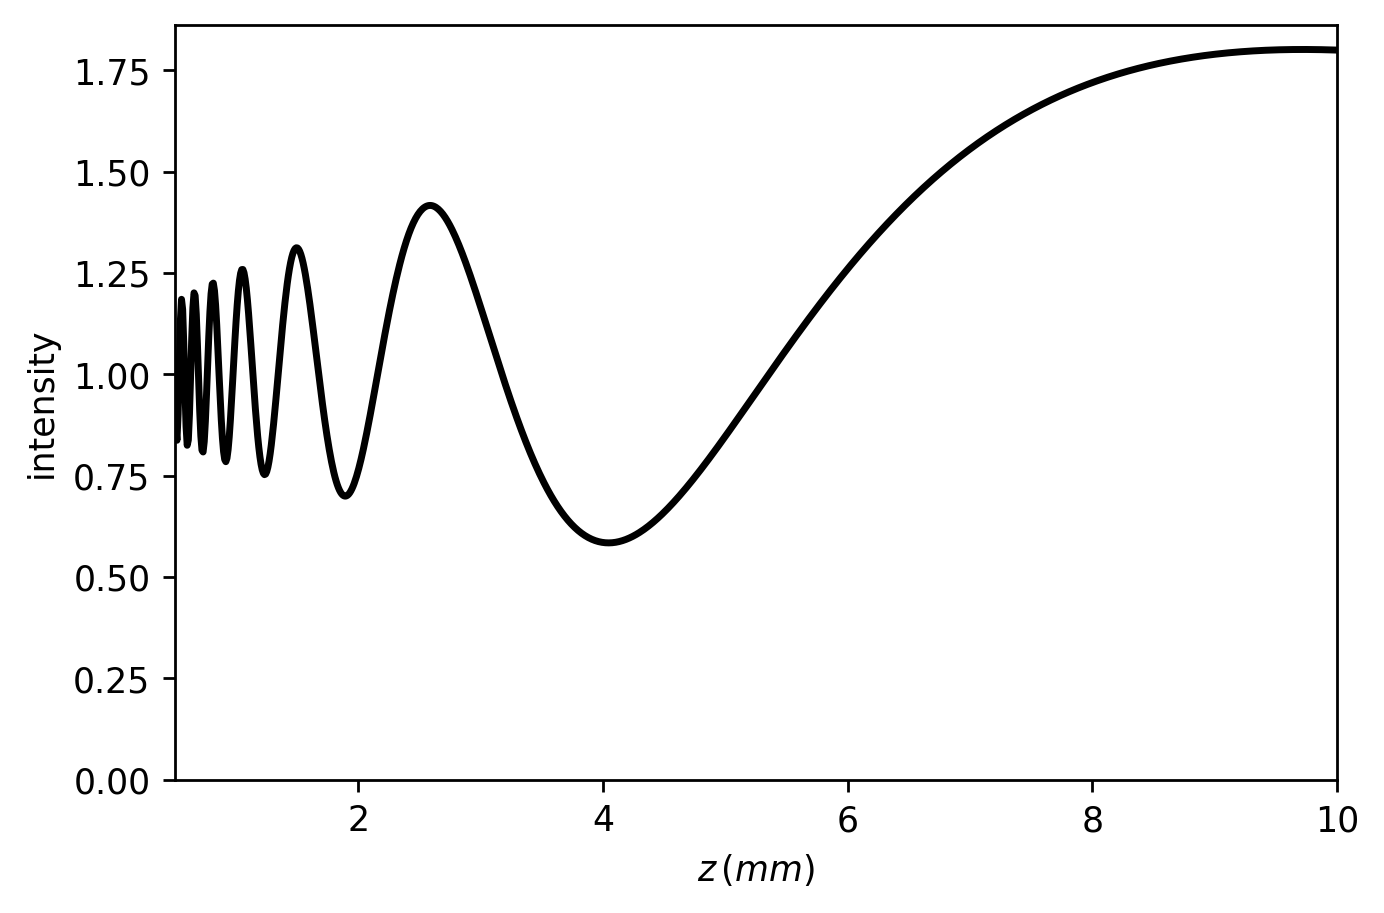

In [21]:
u2.draw(z_scale='mm')


### to field_X

In [22]:
xout = np.linspace(-size, size, 256)
z = 2 * mm


In [23]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 10.4 ms, sys: 281 µs, total: 10.6 ms
Wall time: 9.03 ms


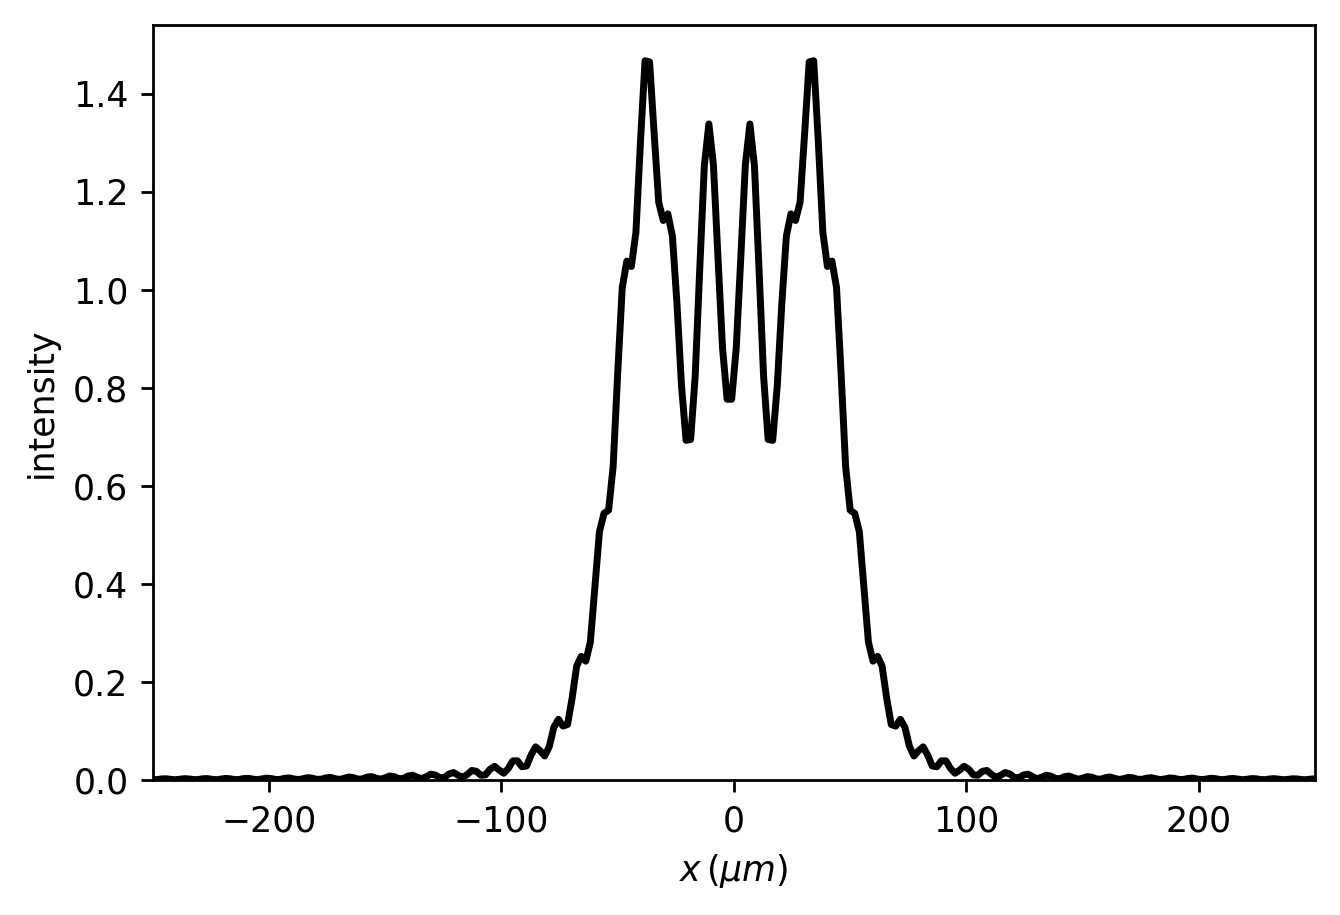

In [24]:
u2.draw()


### to field_XZ

In [25]:
xout = np.linspace(-size / 2, size / 2, 2048)
z = np.linspace(1 * mm, 15 * mm, 128)


In [26]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 922 ms, sys: 589 µs, total: 922 ms
Wall time: 918 ms


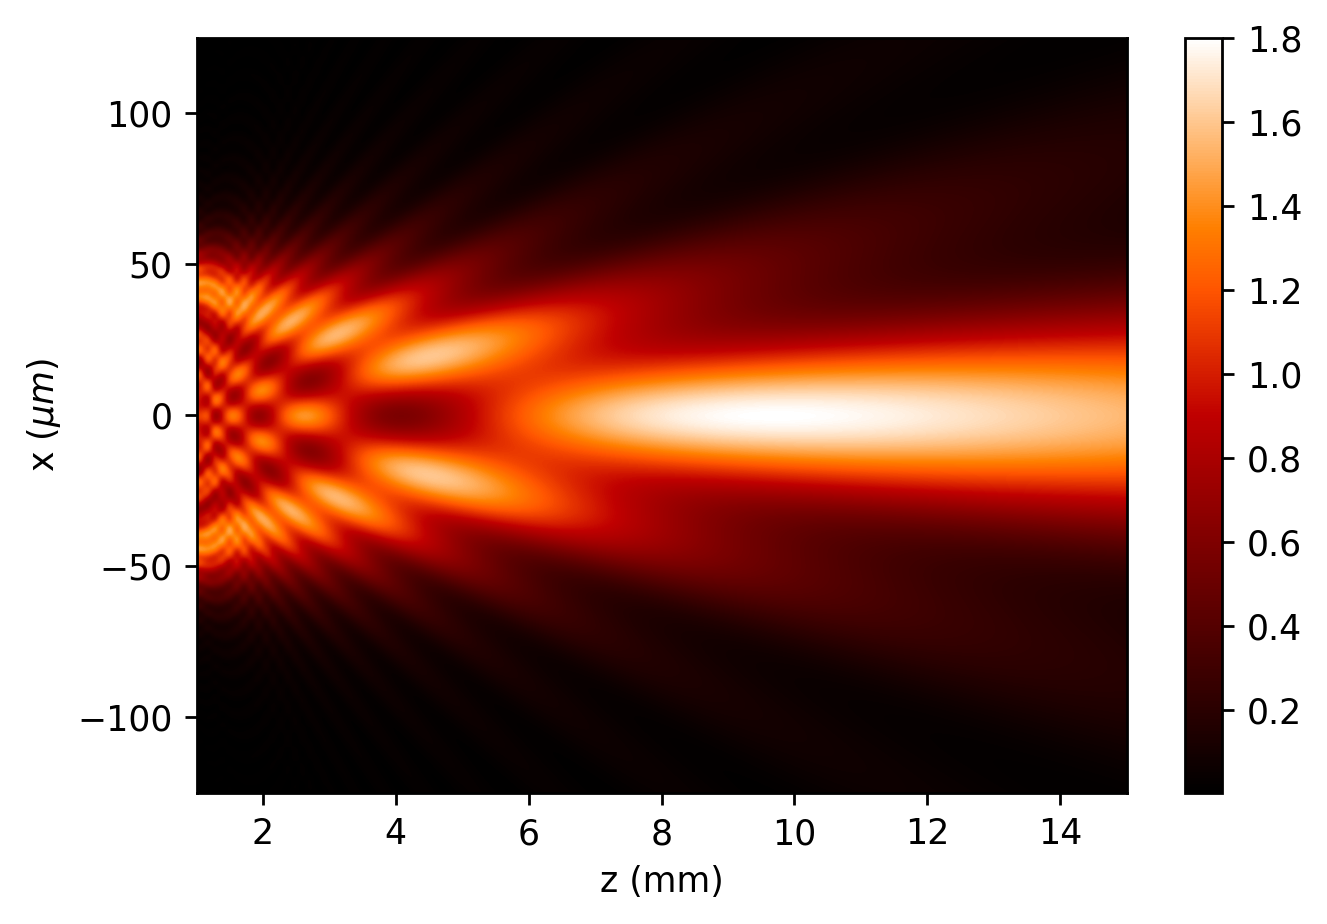

In [27]:
u2.draw(logarithm=0, z_scale='mm')
plt.colorbar()


## XY Scheme

In [28]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z
from diffractio.scalar_fields_X import Scalar_field_X


In [29]:
size = 75
xin = np.linspace(-size, size, 512)
yin = np.linspace(-size, size, 512)
wavelength = 550 * nm


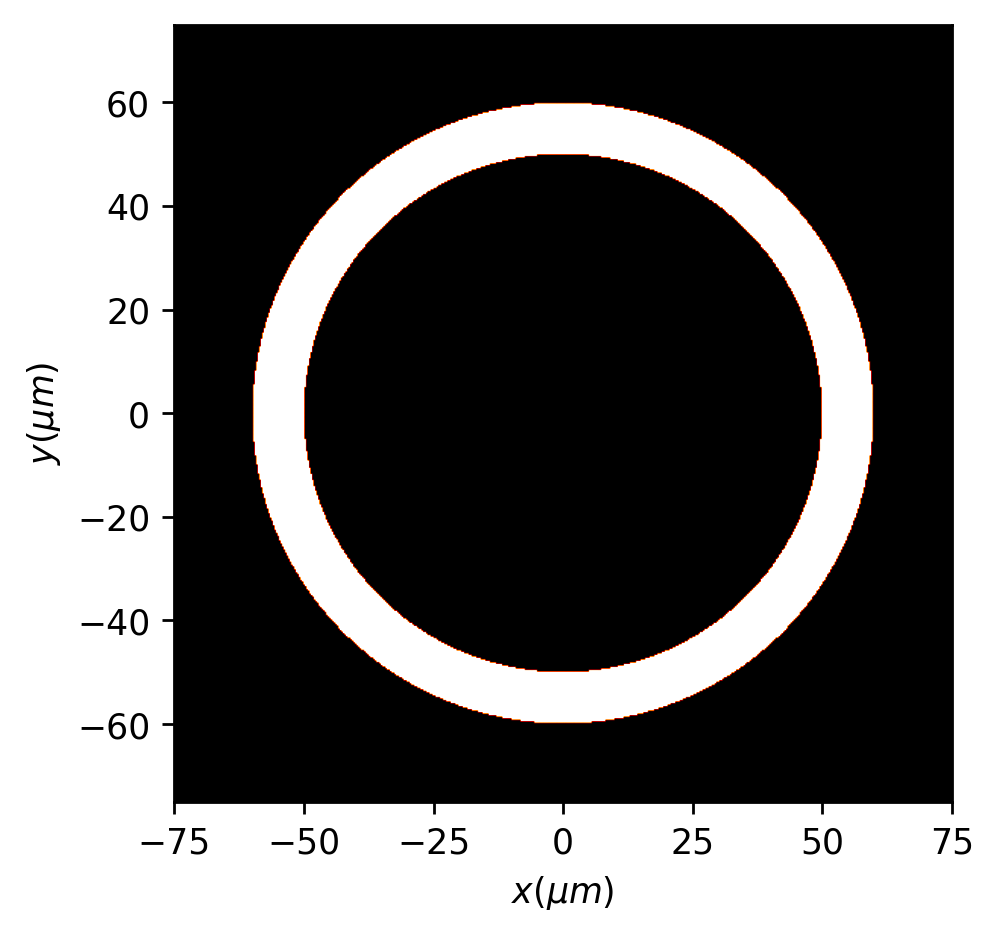

In [30]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.ring(r0=(0 * um, 0 * um), radius1=50 * um, radius2=60 * um)

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw()


### to data

In [31]:
xout = 0
yout = 0.
z = .5*mm


In [32]:
%%time
u2 = u1.CZT(z, xout, yout)
print("{}".format(np.abs(u2)**2))


0.005578354037388983
CPU times: user 75.1 ms, sys: 19.9 ms, total: 95 ms
Wall time: 92.7 ms


### to field_X

In [33]:
xout = np.linspace(-size, size, 512)
yout = 0.
z = .5 * mm


CPU times: user 123 ms, sys: 7.84 ms, total: 131 ms
Wall time: 130 ms


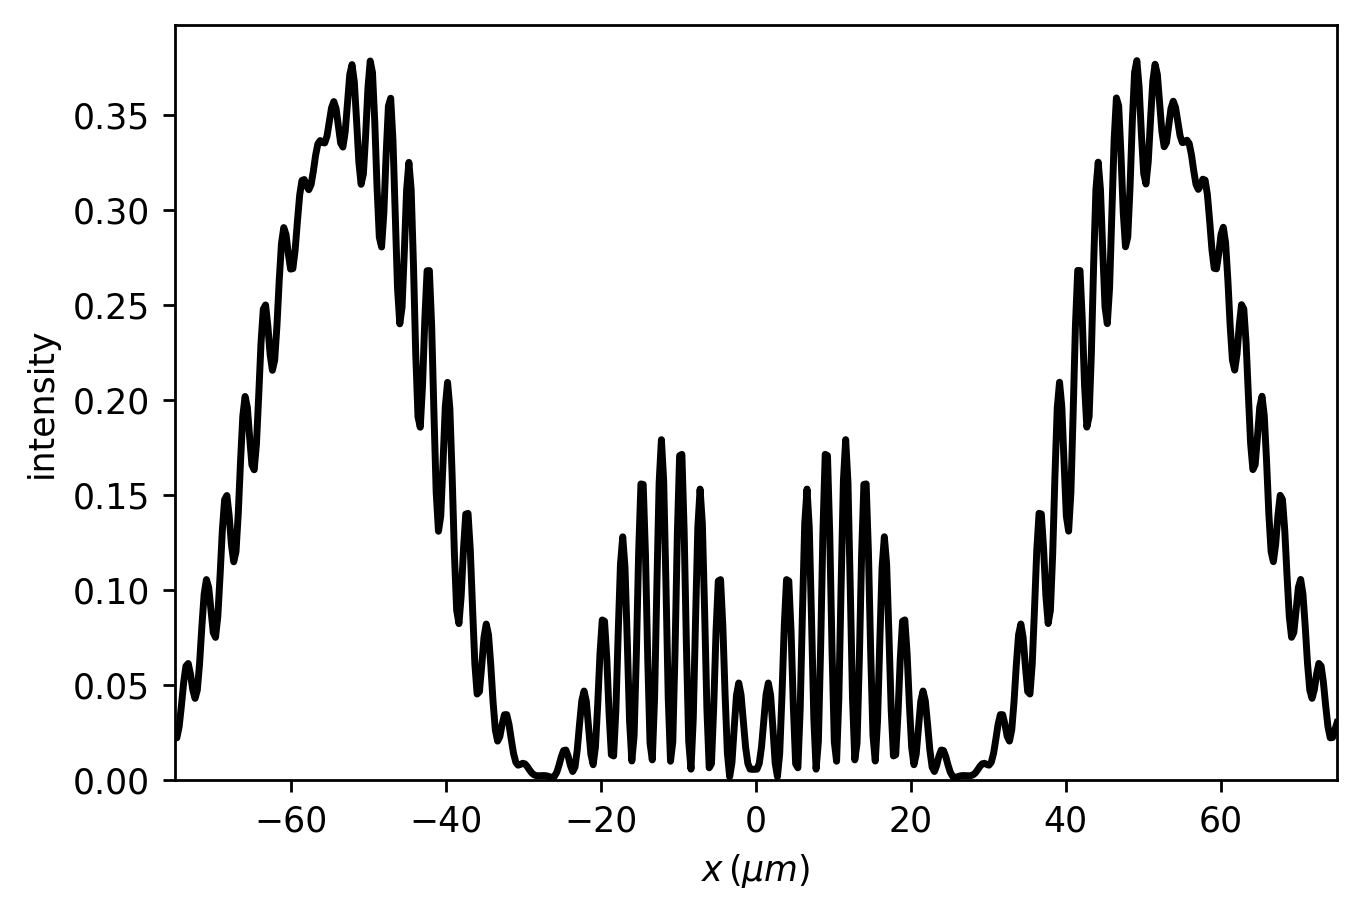

In [34]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_XY


In [35]:
xout = np.linspace(-size, size, 256)
yout = np.linspace(-size, size, 256)
z = .25 * mm


CPU times: user 228 ms, sys: 124 ms, total: 352 ms
Wall time: 212 ms


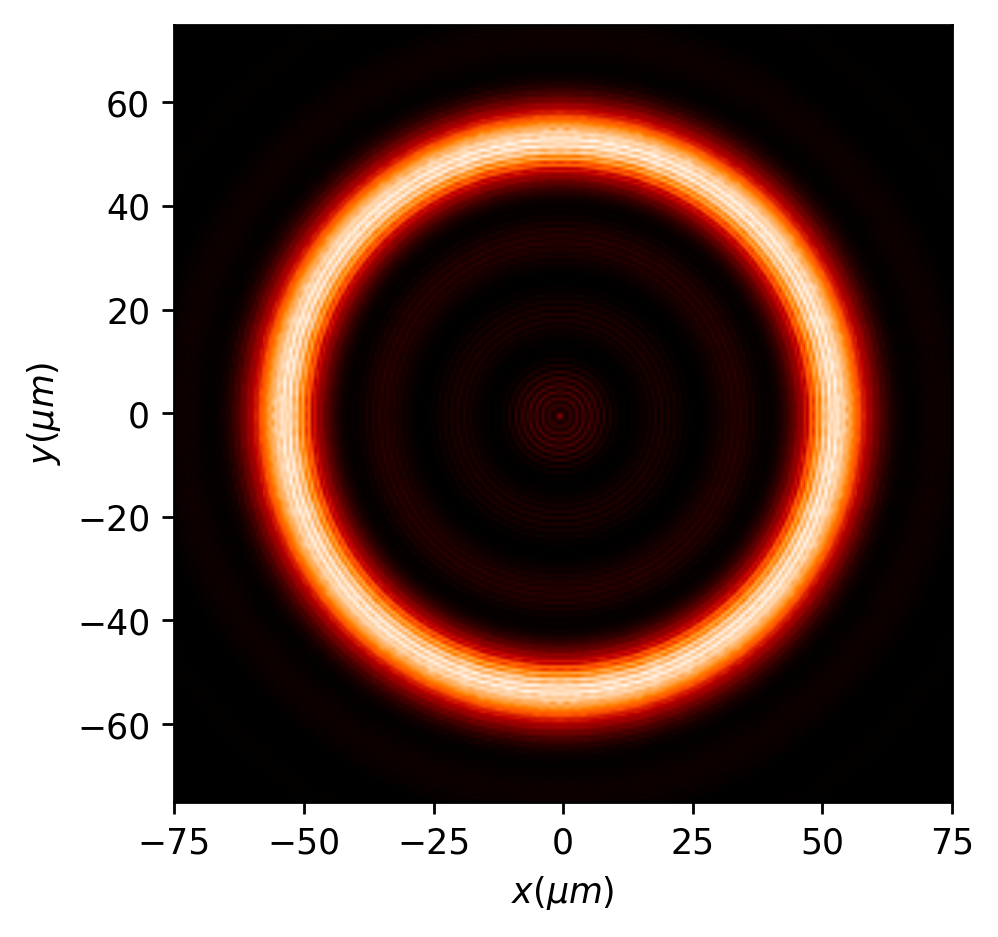

In [36]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_Z

The Z field is computed with a for loop, thus it is a bit slower.

In [37]:
xout = -1.
yout = 0.
z = np.linspace(0.25*mm, 1*mm, 64)


num x, num y, num z = 1, 1, 64
CPU times: user 5.61 s, sys: 107 ms, total: 5.72 s
Wall time: 5.69 s


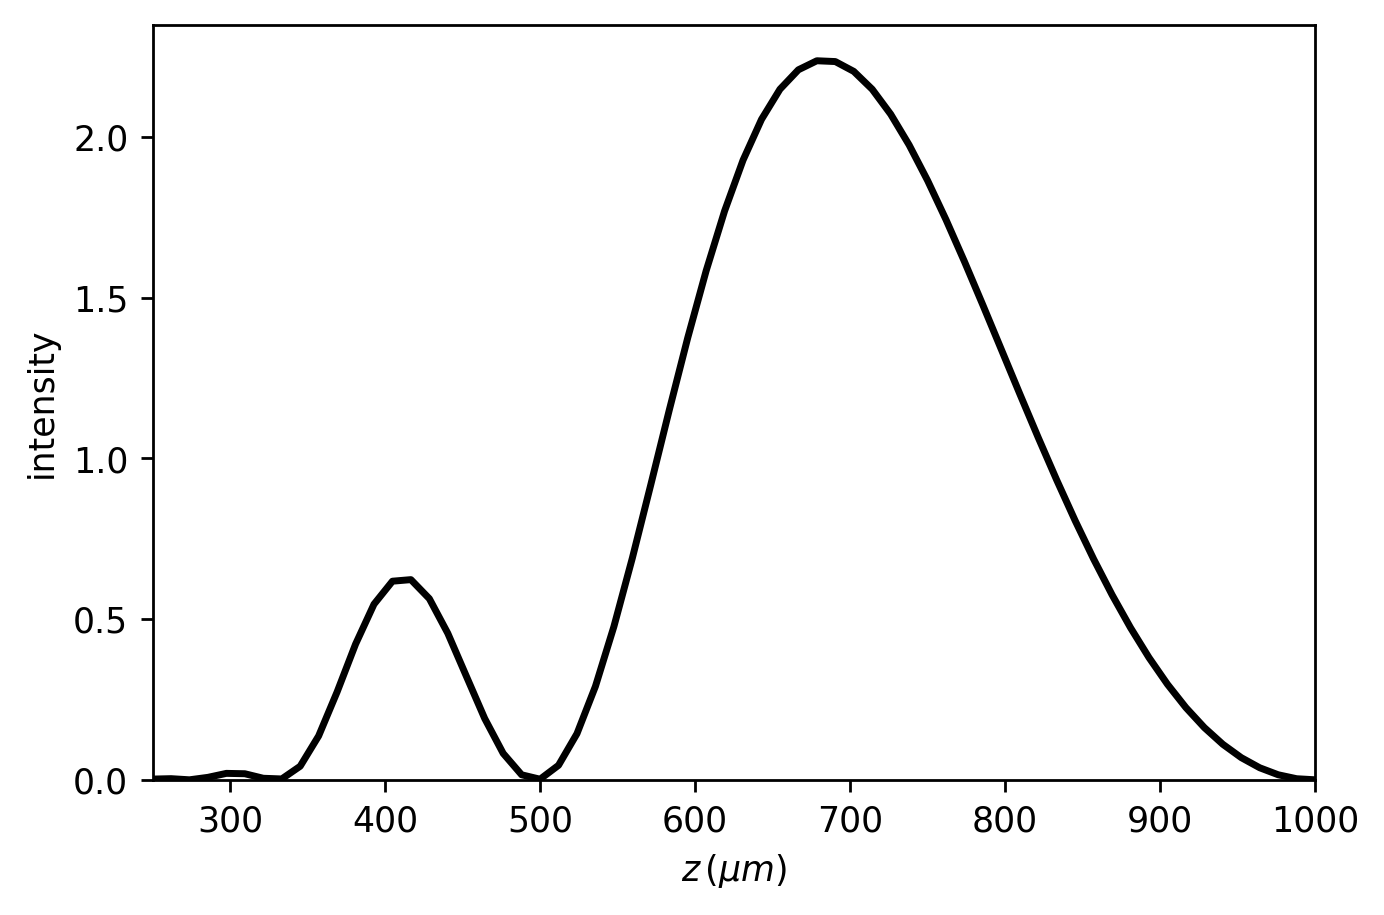

In [38]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw()


### to field_XZ

In [39]:
xout = np.linspace(-size, size, 128)
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 128)


num x, num y, num z = 128, 1, 128
CPU times: user 8.28 s, sys: 596 ms, total: 8.88 s
Wall time: 8.82 s


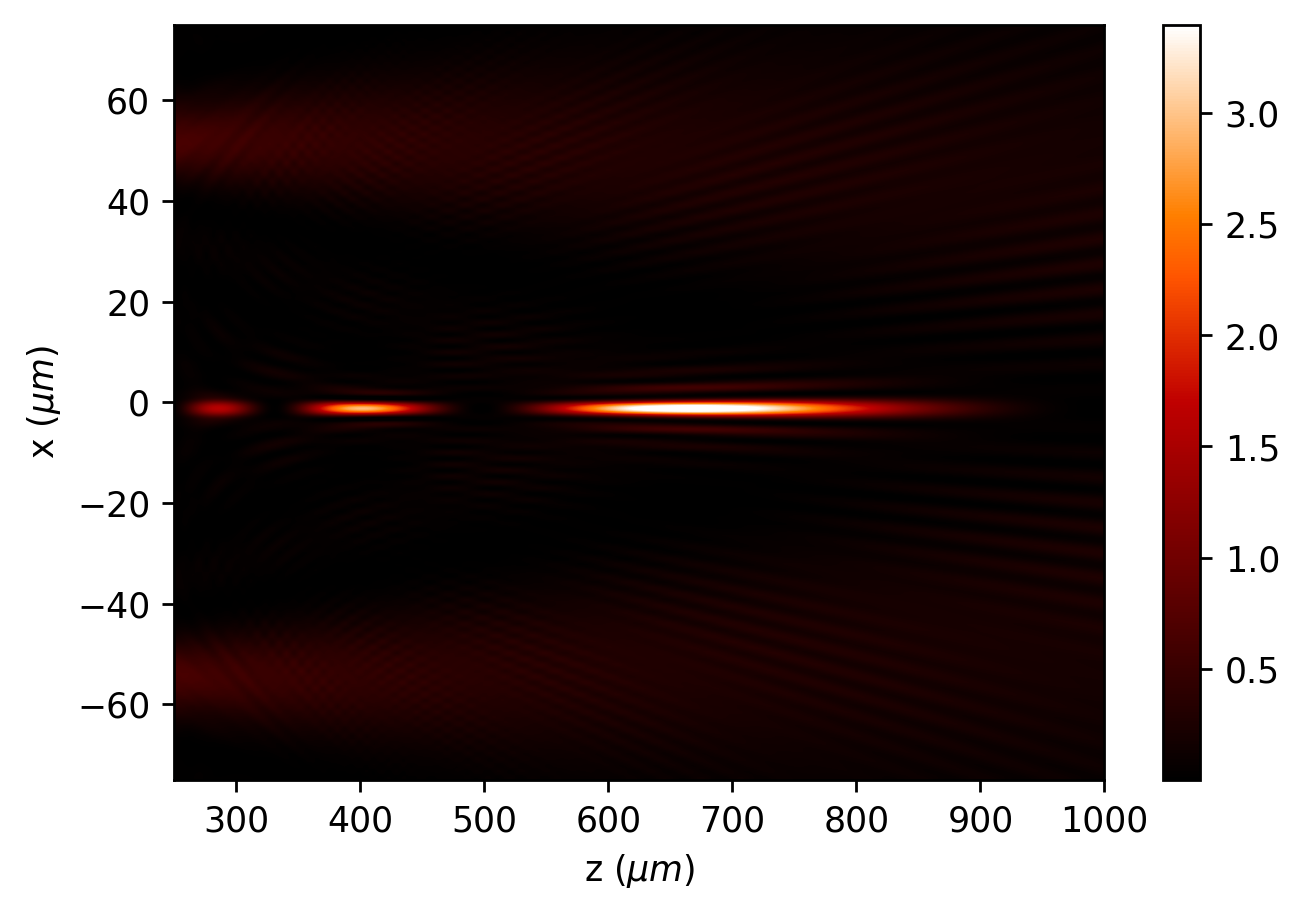

In [40]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw()
plt.colorbar()


### to field_XYZ

In [41]:
xout = np.linspace(-size, size, 128)
yout = np.linspace(-size, size, 128)
z = np.linspace(0.25 * mm, 6* mm, 64)


In [42]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)


num x, num y, num z = 128, 128, 64
CPU times: user 4.84 s, sys: 236 ms, total: 5.08 s
Wall time: 5.05 s


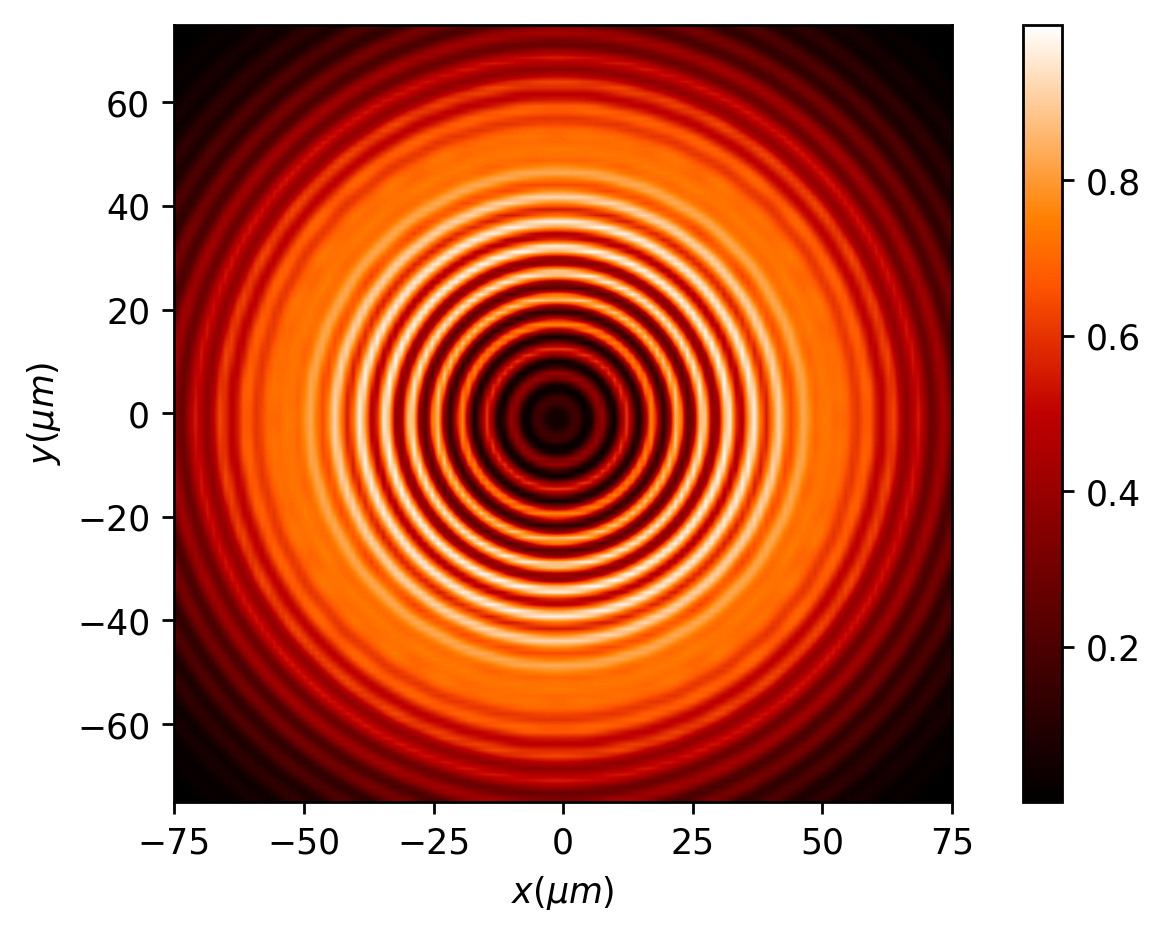

In [43]:
u2.draw_XY(z0=1*mm)
plt.colorbar()


<Figure size 1500x1000 with 0 Axes>

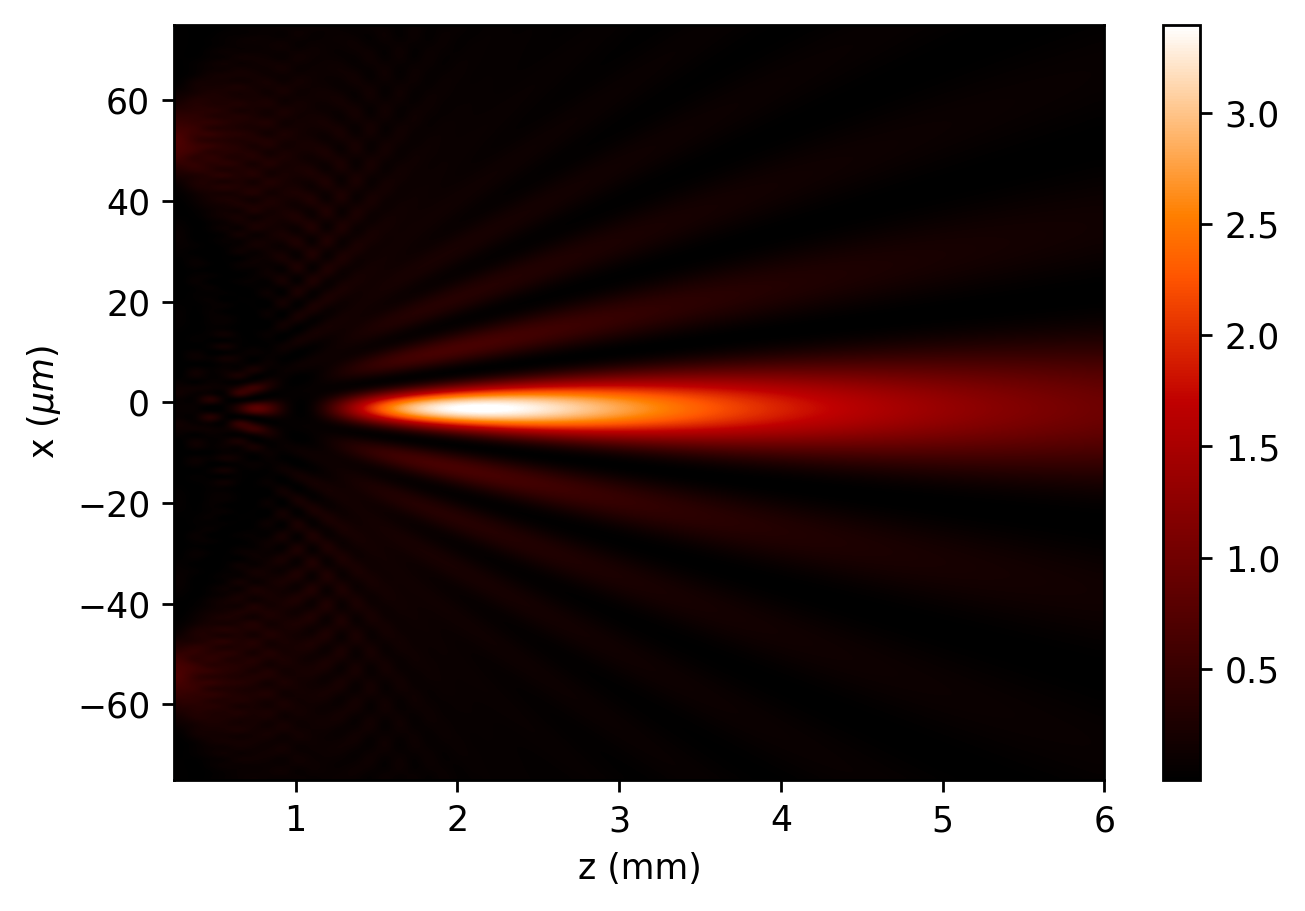

In [44]:
u2.draw_XZ(y0=0, logarithm=0, z_scale='mm')
plt.colorbar()


## CZT for reducing the output size

Chirped z-Transform algorithm is specially indicated for cases where the output field is much smaller than the input field, as you can choose the position and sampling of the field. An important example for this is the focusing of a lens.

### X scheme

In [45]:
size = 3*mm
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
focal = 250 * mm


In [46]:
%load_ext autoreload
%autoreload 2

In [63]:

t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0*u0


In [64]:
xout = 0.
z = np.linspace(focal-30*mm, focal+30*mm, 128)


CPU times: user 546 ms, sys: 8.26 ms, total: 555 ms
Wall time: 717 ms


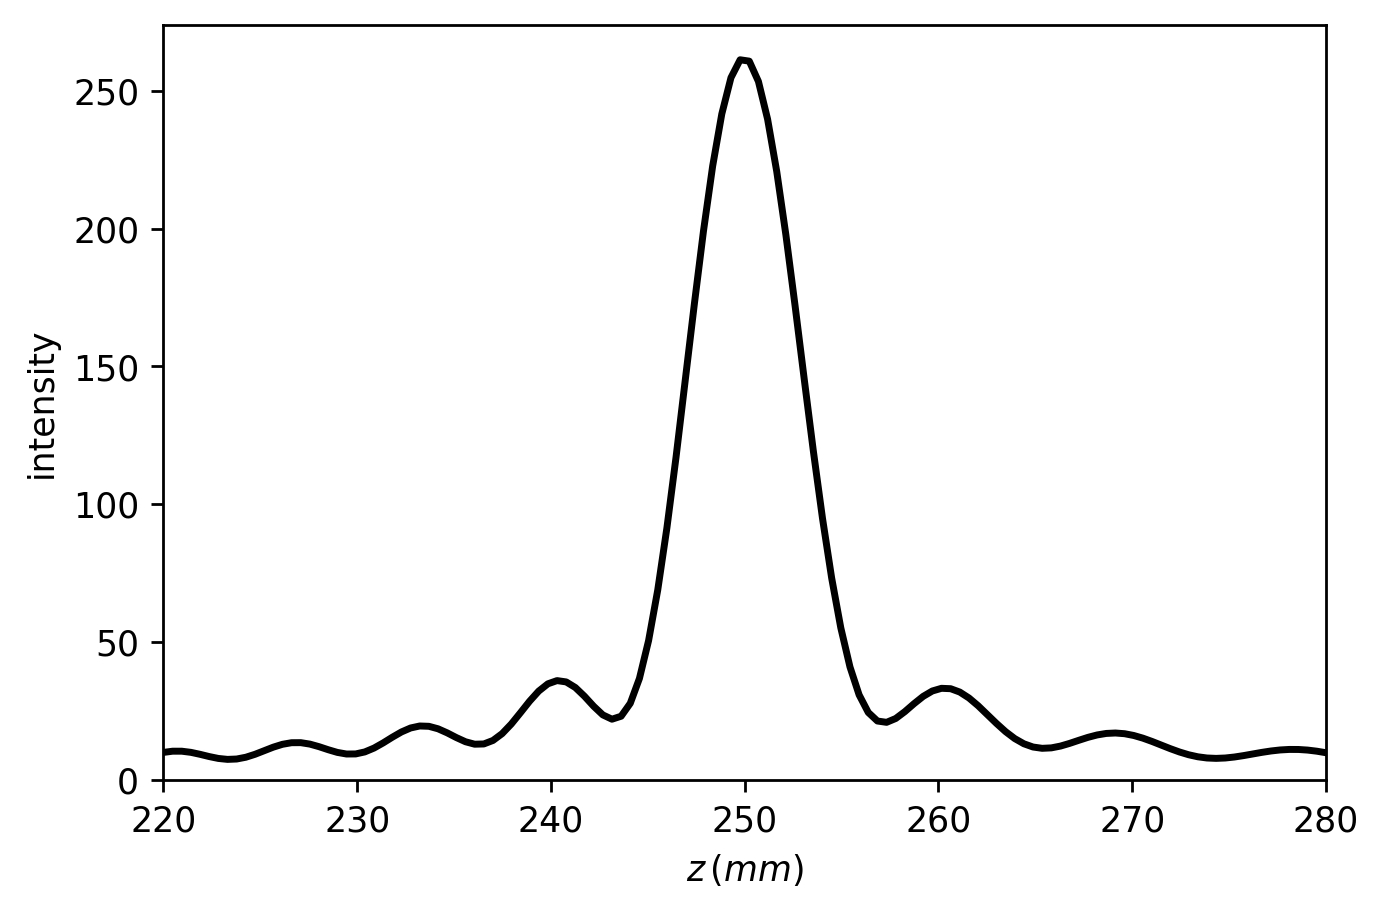

In [66]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(z_scale='mm')


In [67]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = focal


CPU times: user 341 ms, sys: 0 ns, total: 341 ms
Wall time: 365 ms


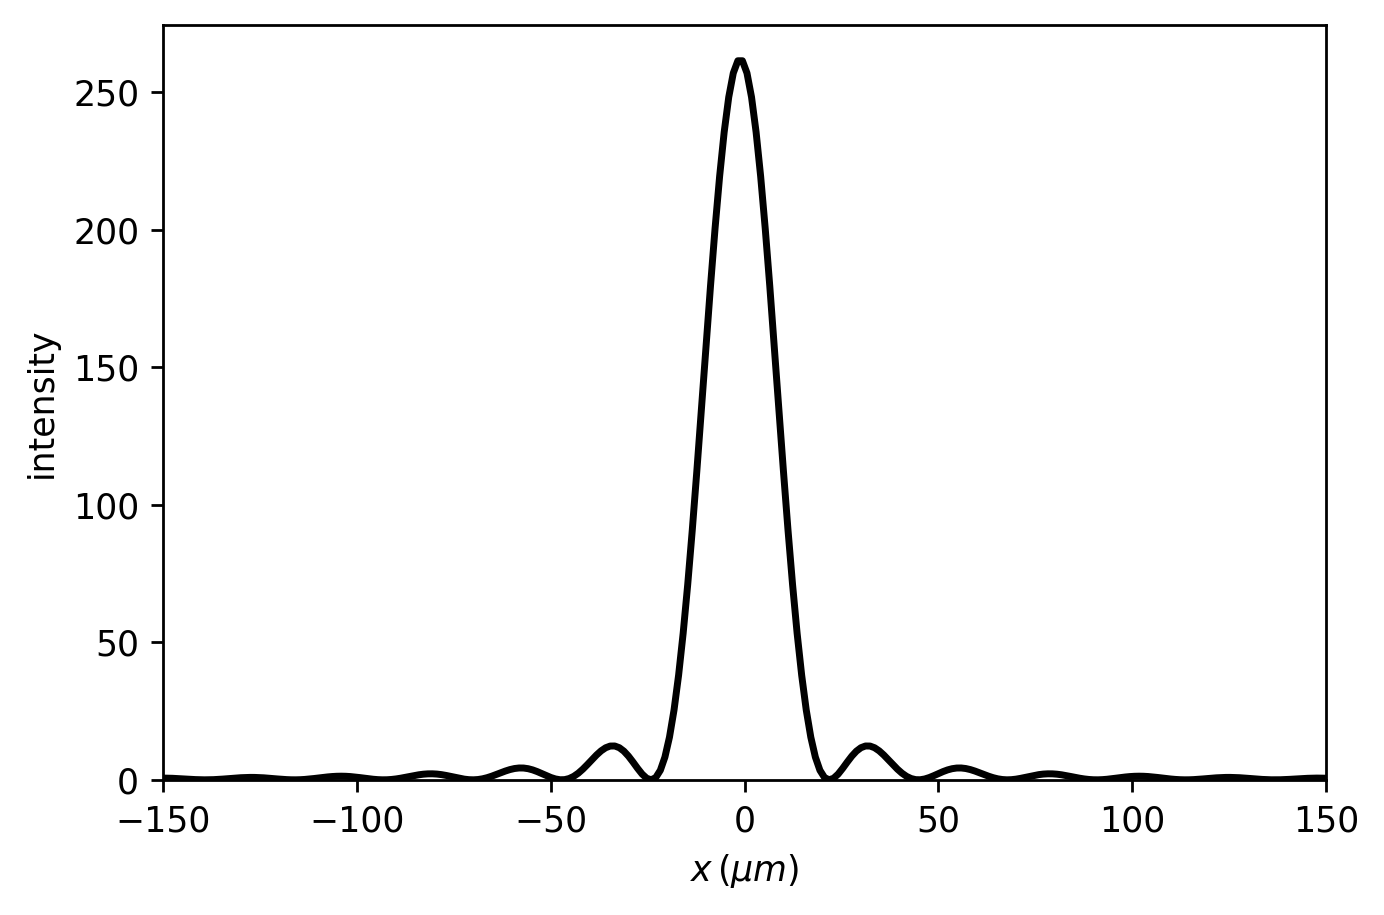

In [68]:
%%time
u2 = u1.CZT(focal, xout)
u2.draw()


In [69]:
xout = np.linspace(-150 * um, 150 * um, 128)
z = np.linspace(focal-20*mm, focal+20*mm, 128)


CPU times: user 1.82 s, sys: 1.94 ms, total: 1.82 s
Wall time: 1.98 s


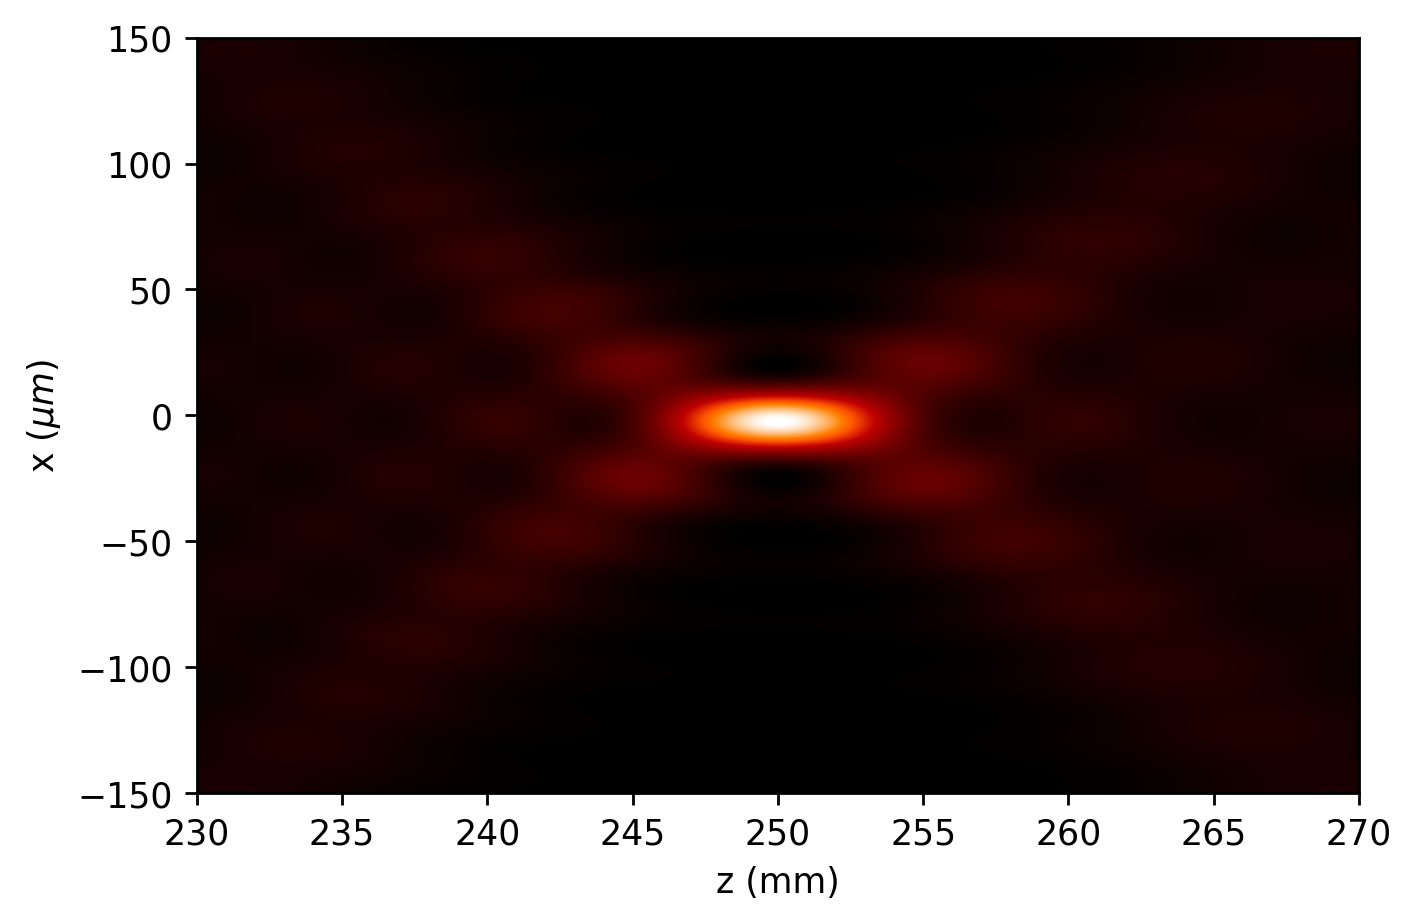

In [70]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(logarithm=0, z_scale='mm')


### XY scheme

In [71]:
size = 2 * mm
xin = np.linspace(-size, size, 512)
yin = np.linspace(-size, size, 512)
wavelength = 550 * nm
focal = 500 * mm


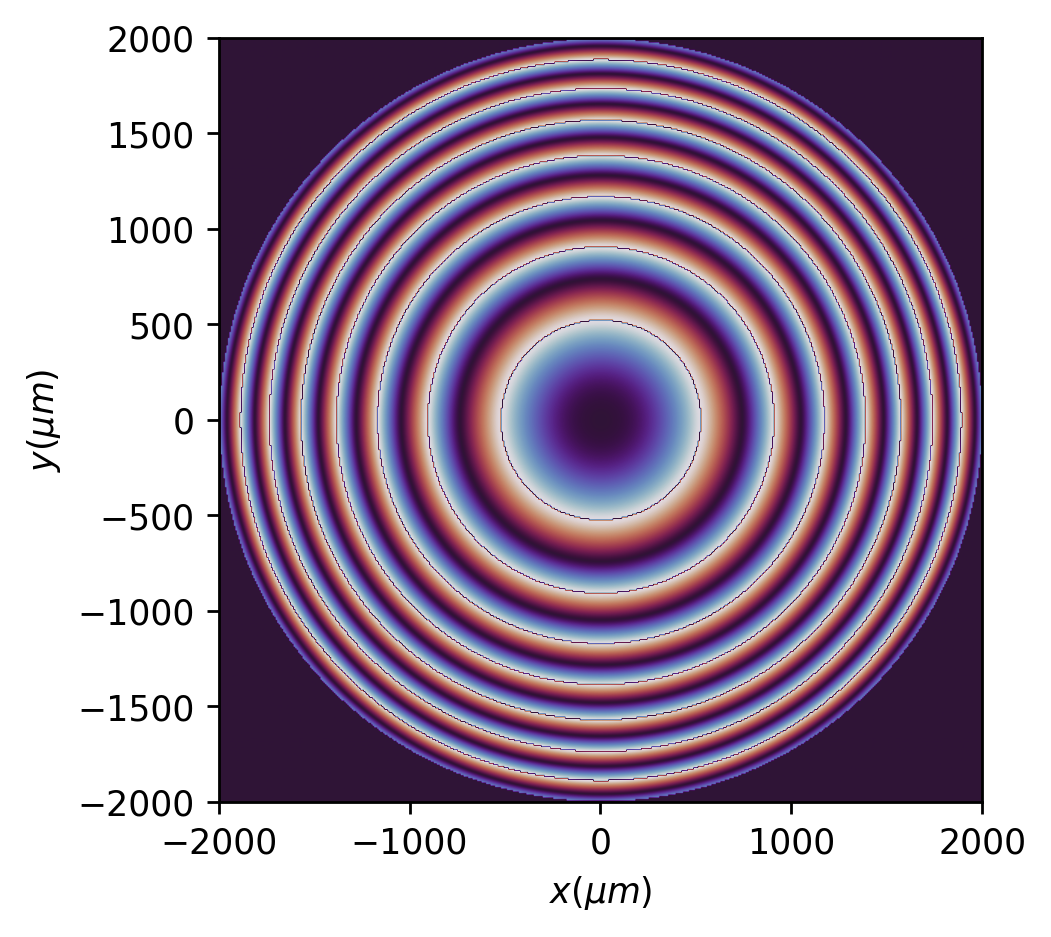

In [72]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.lens(r0=(0, 0), focal=focal, radius=0)
t0.pupil()

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw('phase')


In [73]:
xout = np.linspace(-150 * um, 150 * um, 128)
yout = np.linspace(-150 * um, 150 * um, 128)
z = focal


num x, num y, num z = 128, 128, 1
CPU times: user 465 ms, sys: 193 ms, total: 658 ms
Wall time: 440 ms


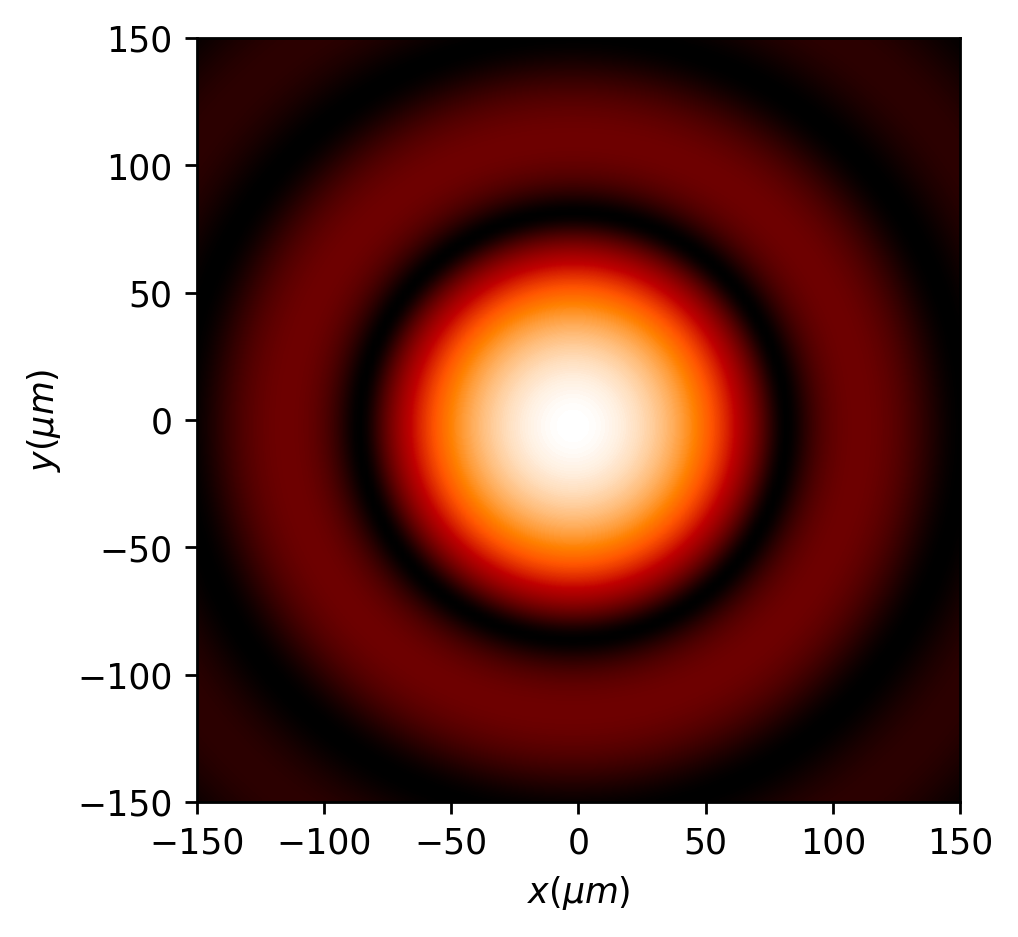

In [74]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw(logarithm=1e-1)
